In [1]:
import yfinance as yf
import pandas as pd
import numpy as np
import datetime
from datetime import timedelta, datetime

In [2]:
indices = ['^NSEI', '^IXIC', '^GSPC', '^FTSE', '^FCHI', '^GDAXI', '^STOXX50E', '^HSI']

In [3]:
from datetime import datetime, timedelta

enddate = datetime.strptime('2025-01-01', '%Y-%m-%d')
startdate = enddate - timedelta(days=500)

In [4]:
tickers = []
for ticker in indices:
  a = yf.Ticker(ticker)
  tickers.append(a)


In [5]:
nifty_data = tickers[0].history(interval='1d', start=startdate, end=enddate)
nifty_data = nifty_data.drop(columns=['Dividends', 'Stock Splits', 'Low', 'High', 'Open'])
nifty_data.index = nifty_data.index.tz_convert(None).normalize()

nasdaq_data = tickers[1].history(interval='1d', start=startdate, end=enddate)
nasdaq_data = nasdaq_data.drop(columns=['Dividends', 'Stock Splits', 'Low', 'High', 'Open'])
nasdaq_data.index = nasdaq_data.index.tz_convert(None).normalize()

snp_data = tickers[2].history(interval='1d', start=startdate, end=enddate)
snp_data = snp_data.drop(columns=['Dividends', 'Stock Splits', 'Low', 'High', 'Open'])
snp_data.index = snp_data.index.tz_convert(None).normalize()

ftse_data = tickers[3].history(interval='1d', start=startdate, end=enddate)
ftse_data = ftse_data.drop(columns=['Dividends', 'Stock Splits', 'Low', 'High', 'Open'])
ftse_data.index = ftse_data.index.tz_convert(None).normalize()

cac_data = tickers[4].history(interval='1d', start=startdate, end=enddate)
cac_data = cac_data.drop(columns=['Dividends', 'Stock Splits', 'Low', 'High', 'Open'])
cac_data.index = cac_data.index.tz_convert(None).normalize()

dax_data = tickers[5].history(interval='1d', start=startdate, end=enddate)
dax_data = dax_data.drop(columns=['Dividends', 'Stock Splits', 'Low', 'High', 'Open'])
dax_data.index = dax_data.index.tz_convert(None).normalize()

euro50 = tickers[6].history(interval='1d', start=startdate, end=enddate)
euro50 = euro50.drop(columns=['Dividends', 'Stock Splits', 'Low', 'High', 'Open'])
euro50.index = euro50.index.tz_convert(None).normalize()

hangseng_data = tickers[7].history(interval='1d', start=startdate, end=enddate)
hangseng_data = hangseng_data.drop(columns=['Dividends', 'Stock Splits', 'Low', 'High', 'Open'])
hangseng_data.index = hangseng_data.index.tz_convert(None).normalize()

In [6]:
dataframes_to_merge = [nifty_data, nasdaq_data, snp_data, ftse_data, cac_data, dax_data, euro50, hangseng_data]
combined_data = dataframes_to_merge[0]

for i in range(1, len(dataframes_to_merge)):
    combined_data = pd.merge(combined_data, dataframes_to_merge[i], left_index=True, right_index=True, how='outer', suffixes=('', f'_{i}'))

combined_data

,Close,Volume,Close_1,Volume_1,Close_2,Volume_2,Close_3,Volume_3,Close_4,Volume_4,Close_5,Volume_5,Close_6,Volume_6,Close_7,Volume_7
Date,,,,,,,,,,,,,,,,
2023-08-20,19393.599609,262600.0,NaN,NaN,NaN,NaN,7257.799805,469504000.0,7198.060059,39845700.0,15603.280273,45251100.0,4224.870117,20937300.0,17623.289062,3.141864e+09
2023-08-21,19396.449219,208700.0,13497.589844,4.363070e+09,4399.770020,3.726850e+09,7270.799805,747925500.0,7240.879883,39824300.0,15705.620117,42807400.0,4260.370117,19604800.0,17791.009766,2.895654e+09
2023-08-22,19444.000000,225200.0,13505.870117,4.282430e+09,4387.549805,3.522760e+09,7320.500000,909639000.0,7246.620117,39128000.0,15728.410156,53425400.0,4266.669922,20544100.0,17845.919922,2.499732e+09
2023-08-23,19386.699219,268300.0,13721.030273,4.127850e+09,4436.009766,3.837270e+09,7333.600098,377395800.0,7214.459961,37453800.0,15621.490234,48251600.0,4232.220215,22628100.0,18212.169922,2.758913e+09
2023-08-24,19265.800781,466500.0,13463.969727,4.383820e+09,4376.310059,3.723470e+09,7338.600098,372649700.0,7229.600098,32957800.0,15631.820312,44315200.0,4236.250000,18675600.0,18119.390625,2.467697e+09
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-12-26,23813.400391,176800.0,20020.359375,6.467910e+09,6037.589844,2.904530e+09,NaN,NaN,7355.370117,46195200.0,19984.320312,43396400.0,4898.879883,17347300.0,20090.460938,2.906600e+09
2024-12-27,NaN,NaN,19722.029297,7.765120e+09,5970.839844,3.159610e+09,8149.799805,356239100.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2024-12-29,23644.900391,364900.0,NaN,NaN,NaN,NaN,NaN,NaN,7313.560059,41887400.0,19909.140625,26662200.0,4869.279785,14296800.0,20041.419922,2.724900e+09


In [7]:
combined_data.describe()

,Close,Volume,Close_1,Volume_1,Close_2,Volume_2,Close_3,Volume_3,Close_4,Volume_4,Close_5,Volume_5,Close_6,Volume_6,Close_7,Volume_7
count,335.000000,3.350000e+02,344.000000,3.440000e+02,344.000000,3.440000e+02,346.000000,3.460000e+02,349.000000,3.490000e+02,347.000000,3.470000e+02,343.000000,3.430000e+02,335.000000,3.350000e+02
mean,22550.283116,2.995245e+05,16331.204439,5.569110e+09,5166.701017,3.892620e+09,7926.361280,8.662804e+08,7536.910590,5.813541e+07,17674.094000,6.518151e+07,4707.958132,2.644054e+07,17888.842182,2.784973e+09
std,1956.019291,1.069029e+05,1943.773664,1.267312e+09,542.457262,7.664806e+08,344.359437,3.154368e+08,338.889407,2.248252e+07,1453.621562,2.316225e+07,307.382485,8.525328e+06,1460.330391,1.185059e+09
min,18857.250000,0.000000e+00,12595.610352,2.541840e+09,4117.370117,1.639500e+09,7257.799805,0.000000e+00,6795.379883,0.000000e+00,14687.410156,0.000000e+00,4014.360107,1.042380e+07,14961.179688,7.454664e+08
25%,21385.625000,2.321500e+05,14774.940430,4.779062e+09,4719.459839,3.515070e+09,7614.750000,6.582360e+08,7279.509766,4.824260e+07,16628.040039,5.246235e+07,4466.540039,2.175415e+07,16791.495117,2.113580e+09
50%,22462.000000,2.852000e+05,16311.169922,5.229035e+09,5203.959961,3.795650e+09,8028.500000,8.199949e+08,7503.279785,5.474210e+07,18068.210938,6.245440e+07,4846.729980,2.512560e+07,17655.410156,2.556600e+09
75%,24322.200195,3.521500e+05,17887.065430,5.929530e+09,5599.902588,4.053868e+09,8247.599854,1.031774e+09,7695.779785,6.634410e+07,18701.910156,7.337755e+07,4951.660156,2.915425e+07,18481.114258,3.144574e+09
max,26216.050781,1.006100e+06,20173.890625,1.193260e+10,6090.270020,8.223220e+09,8445.799805,2.813498e+09,8239.990234,1.589527e+08,20426.269531,2.029106e+08,5100.899902,8.389400e+07,23099.779297,1.125790e+10


In [8]:
combined_data.isna().sum()

,0
Close,92
Volume,92
Close_1,83
Volume_1,83
Close_2,83
Volume_2,83
Close_3,81
Volume_3,81
Close_4,78
Volume_4,78


In [9]:
columns_to_bfill = ['Close_1', 'Volume_1', 'Close_2', 'Volume_2']
for col in combined_data:
    if col in columns_to_bfill:
        combined_data[col] = combined_data[col].fillna(method='bfill')

for col in combined_data:
    if col not in columns_to_bfill:
        combined_data[col] = combined_data[col].fillna(method='ffill')

combined_data

<ipython-input-9-3300641521>:4: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  combined_data[col] = combined_data[col].fillna(method='bfill')
<ipython-input-9-3300641521>:8: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  combined_data[col] = combined_data[col].fillna(method='ffill')


,Close,Volume,Close_1,Volume_1,Close_2,Volume_2,Close_3,Volume_3,Close_4,Volume_4,Close_5,Volume_5,Close_6,Volume_6,Close_7,Volume_7
Date,,,,,,,,,,,,,,,,
2023-08-20,19393.599609,262600.0,13497.589844,4.363070e+09,4399.770020,3.726850e+09,7257.799805,469504000.0,7198.060059,39845700.0,15603.280273,45251100.0,4224.870117,20937300.0,17623.289062,3.141864e+09
2023-08-21,19396.449219,208700.0,13497.589844,4.363070e+09,4399.770020,3.726850e+09,7270.799805,747925500.0,7240.879883,39824300.0,15705.620117,42807400.0,4260.370117,19604800.0,17791.009766,2.895654e+09
2023-08-22,19444.000000,225200.0,13505.870117,4.282430e+09,4387.549805,3.522760e+09,7320.500000,909639000.0,7246.620117,39128000.0,15728.410156,53425400.0,4266.669922,20544100.0,17845.919922,2.499732e+09
2023-08-23,19386.699219,268300.0,13721.030273,4.127850e+09,4436.009766,3.837270e+09,7333.600098,377395800.0,7214.459961,37453800.0,15621.490234,48251600.0,4232.220215,22628100.0,18212.169922,2.758913e+09
2023-08-24,19265.800781,466500.0,13463.969727,4.383820e+09,4376.310059,3.723470e+09,7338.600098,372649700.0,7229.600098,32957800.0,15631.820312,44315200.0,4236.250000,18675600.0,18119.390625,2.467697e+09
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-12-26,23813.400391,176800.0,20020.359375,6.467910e+09,6037.589844,2.904530e+09,8137.000000,243246600.0,7355.370117,46195200.0,19984.320312,43396400.0,4898.879883,17347300.0,20090.460938,2.906600e+09
2024-12-27,23813.400391,176800.0,19722.029297,7.765120e+09,5970.839844,3.159610e+09,8149.799805,356239100.0,7355.370117,46195200.0,19984.320312,43396400.0,4898.879883,17347300.0,20090.460938,2.906600e+09
2024-12-29,23644.900391,364900.0,19486.789062,8.384090e+09,5906.939941,3.433250e+09,8149.799805,356239100.0,7313.560059,41887400.0,19909.140625,26662200.0,4869.279785,14296800.0,20041.419922,2.724900e+09


In [10]:
combined_data.isna().sum()

,0
Close,0
Volume,0
Close_1,0
Volume_1,0
Close_2,0
Volume_2,0
Close_3,0
Volume_3,0
Close_4,0
Volume_4,0


In [11]:
combined_data.describe()

,Close,Volume,Close_1,Volume_1,Close_2,Volume_2,Close_3,Volume_3,Close_4,Volume_4,Close_5,Volume_5,Close_6,Volume_6,Close_7,Volume_7
count,427.000000,4.270000e+02,427.000000,4.270000e+02,427.000000,4.270000e+02,427.000000,4.270000e+02,427.000000,4.270000e+02,427.000000,4.270000e+02,427.000000,4.270000e+02,427.000000,4.270000e+02
mean,22540.132780,3.025061e+05,16339.430671,5.543195e+09,5168.050139,3.852069e+09,7928.278225,8.635609e+08,7539.802421,5.864086e+07,17704.969409,6.654571e+07,4713.422879,2.691786e+07,17903.496318,2.801441e+09
std,1944.837072,1.080176e+05,1943.978996,1.241478e+09,541.727844,7.352073e+08,344.444407,3.389785e+08,339.475176,2.492964e+07,1460.423554,2.583592e+07,304.899369,9.568139e+06,1473.615475,1.215299e+09
min,18857.250000,0.000000e+00,12595.610352,2.541840e+09,4117.370117,1.639500e+09,7257.799805,0.000000e+00,6795.379883,0.000000e+00,14687.410156,0.000000e+00,4014.360107,1.042380e+07,14961.179688,7.454664e+08
25%,21352.599609,2.351000e+05,14771.940430,4.762395e+09,4739.885010,3.483175e+09,7615.500000,6.532300e+08,7282.689941,4.809660e+07,16669.899414,5.241010e+07,4477.014893,2.163540e+07,16791.495117,2.107844e+09
50%,22466.099609,2.876000e+05,16315.700195,5.232820e+09,5203.580078,3.768310e+09,8040.399902,8.123003e+08,7503.279785,5.499900e+07,18076.689453,6.304710e+07,4851.959961,2.524310e+07,17660.019531,2.558635e+09
75%,24304.349609,3.549000e+05,17894.830078,5.945440e+09,5602.685059,4.036220e+09,8248.799805,1.027785e+09,7707.455078,6.690120e+07,18718.214844,7.585520e+07,4954.544922,2.964375e+07,18481.114258,3.209500e+09
max,26216.050781,1.006100e+06,20173.890625,1.193260e+10,6090.270020,8.223220e+09,8445.799805,2.813498e+09,8239.990234,1.589527e+08,20426.269531,2.029106e+08,5100.899902,8.389400e+07,23099.779297,1.125790e+10


In [12]:
combined_data.corr()

,Close,Volume,Close_1,Volume_1,Close_2,Volume_2,Close_3,Volume_3,Close_4,Volume_4,Close_5,Volume_5,Close_6,Volume_6,Close_7,Volume_7
Close,1.000000,0.129435,0.901967,0.410262,0.924939,0.035838,0.884765,0.064076,0.290123,0.182252,0.890923,-0.182795,0.797492,-0.130149,0.439307,0.386818
Volume,0.129435,1.000000,0.099176,0.165906,0.111467,0.367979,0.120175,0.391031,0.310840,0.389481,0.148029,0.439954,0.244310,0.455750,-0.089984,0.270871
Close_1,0.901967,0.099176,1.000000,0.544769,0.992960,0.041670,0.848129,0.046352,0.253593,0.217906,0.960380,-0.178340,0.799997,-0.131858,0.578223,0.351702
Volume_1,0.410262,0.165906,0.544769,1.000000,0.527585,0.552564,0.397064,0.224539,0.055383,0.307895,0.523256,0.185844,0.351791,0.177741,0.350139,0.189880
Close_2,0.924939,0.111467,0.992960,0.527585,1.000000,0.044473,0.868005,0.063175,0.275218,0.212045,0.971102,-0.171427,0.815601,-0.121876,0.584643,0.382034
Volume_2,0.035838,0.367979,0.041670,0.552564,0.044473,1.000000,-0.031590,0.510137,0.030361,0.467957,0.051270,0.580092,0.045089,0.566473,-0.052930,0.117239
Close_3,0.884765,0.120175,0.848129,0.397064,0.868005,-0.031590,1.000000,0.049015,0.379298,0.159688,0.883446,-0.174167,0.811346,-0.110321,0.558757,0.407688
Volume_3,0.064076,0.391031,0.046352,0.224539,0.063175,0.510137,0.049015,1.000000,0.378886,0.375885,0.114624,0.513180,0.258730,0.532176,-0.160666,0.137630
Close_4,0.290123,0.310840,0.253593,0.055383,0.275218,0.030361,0.379298,0.378886,1.000000,0.054788,0.434434,0.092335,0.766856,0.114977,-0.120394,0.295863
Volume_4,0.182252,0.389481,0.217906,0.307895,0.212045,0.467957,0.159688,0.375885,0.054788,1.000000,0.205477,0.570055,0.179830,0.625815,0.113735,0.217565


In [13]:
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns


<Axes: >

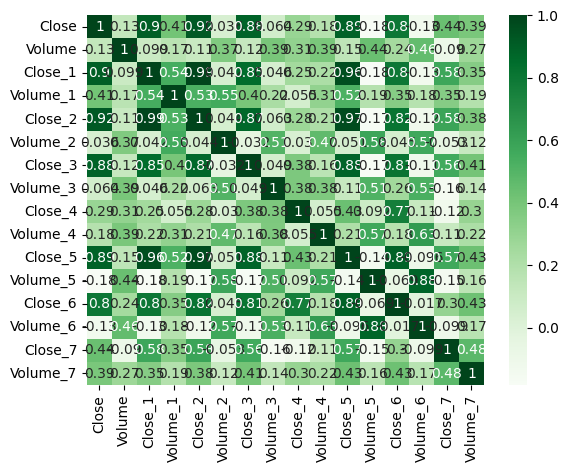

In [14]:
sns.heatmap(combined_data.corr(),
            annot=True,
            cmap = 'Greens')

In [15]:
px.histogram(combined_data,
             x=['Volume', 'Volume_1', 'Volume_2', 'Volume_3', 'Volume_4', 'Volume_5', 'Volume_6', 'Volume_7'])

In [16]:
px.histogram(combined_data,
             x=['Volume_1', 'Volume_2', 'Volume_3', 'Volume_7'])

In [17]:
px.histogram(combined_data,
             x=['Volume_1', 'Volume_2'])

In [18]:
px.histogram(combined_data,
             x=['Volume_4', 'Volume_5', 'Volume_6'])

In [19]:
px.histogram(combined_data,
             x=['Volume'])

In [20]:
from sklearn.preprocessing import MinMaxScaler
scaler1 = MinMaxScaler()
scaled_combined_data = scaler1.fit_transform(combined_data)
scaled_combined_data = pd.DataFrame(scaled_combined_data)
scaled_combined_data.columns = combined_data.columns
scaled_combined_data

,Close,Volume,Close_1,Volume_1,Close_2,Volume_2,Close_3,Volume_3,Close_4,Volume_4,Close_5,Volume_5,Close_6,Volume_6,Close_7,Volume_7
0,0.072885,0.261008,0.119022,0.193939,0.143139,0.317047,0.000000,0.166876,0.278747,0.250676,0.159591,0.223010,0.193743,0.143099,0.327097,0.227958
1,0.073273,0.207435,0.119022,0.193939,0.143139,0.317047,0.010943,0.265835,0.308388,0.250542,0.177424,0.210967,0.226416,0.124962,0.347705,0.204538
2,0.079734,0.223835,0.120114,0.185351,0.136945,0.286048,0.052778,0.323312,0.312361,0.246161,0.181395,0.263295,0.232214,0.137747,0.354452,0.166875
3,0.071948,0.266673,0.148506,0.168890,0.161508,0.333819,0.063805,0.134138,0.290099,0.235629,0.162764,0.237797,0.200508,0.166112,0.399453,0.191530
4,0.055519,0.463672,0.114585,0.196148,0.131248,0.316534,0.068014,0.132451,0.300579,0.207343,0.164564,0.218398,0.204217,0.112315,0.388053,0.163828
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
422,0.673500,0.175728,0.979741,0.418078,0.973298,0.192145,0.740068,0.086457,0.387641,0.290622,0.922990,0.213870,0.814070,0.094235,0.630241,0.205579
423,0.673500,0.175728,0.940374,0.556215,0.939465,0.230889,0.750842,0.126618,0.387641,0.290622,0.922990,0.213870,0.814070,0.094235,0.630241,0.205579
424,0.650602,0.362688,0.909333,0.622127,0.907076,0.272452,0.750842,0.126618,0.358699,0.263521,0.909890,0.131399,0.786828,0.052715,0.624216,0.188295
425,0.650588,0.192426,0.909333,0.622127,0.907076,0.272452,0.726599,0.115529,0.405203,0.146216,0.909890,0.131399,0.786828,0.052715,0.626492,0.092903


In [21]:
from sklearn.model_selection import train_test_split

# Assuming scaled_combined_data is your complete dataset
X = scaled_combined_data.drop(columns=['Close'])
y = scaled_combined_data['Close']

# Split the data into training and a temporary set (validation + test)
x_train, x_temp, y_train, y_temp = train_test_split(X, y, test_size=0.4, random_state=42)

# Split the temporary set into validation and test sets
x_val, x_test, y_val, y_test = train_test_split(x_temp, y_temp, test_size=0.5, random_state=42)

In [22]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

In [23]:
regressor = RandomForestRegressor(oob_score=True)
regressor.fit(x_train, y_train)

RandomForestRegressor(oob_score=True)

In [24]:
oob_score = regressor.oob_score_
oob_score

0.9723334520592394

In [25]:
regressor.fit(x_val, y_val)

RandomForestRegressor(oob_score=True)

In [26]:
new_oob = regressor.oob_score_
new_oob

0.9510416241639605

In [27]:
y_test_pred = regressor.predict(x_test)
new2_oob = regressor.oob_score_
new2_oob

0.9510416241639605

In [28]:
mse = mean_squared_error(y_test, y_test_pred)
mse

0.0032004179962961993

In [29]:
r2 = r2_score(y_test, y_test_pred)
r2

0.95536850530369

In [30]:
spread_1 = combined_data['Close'] - combined_data['Close_1']
spread_2 = combined_data['Close'] - combined_data['Close_2']
spread_3 = combined_data['Close'] - combined_data['Close_3']
spread_4 = combined_data['Close'] - combined_data['Close_4']
spread_5 = combined_data['Close'] - combined_data['Close_5']
spread_6 = combined_data['Close'] - combined_data['Close_6']
spread_7 = combined_data['Close'] - combined_data['Close_7']

spreadv_1 = combined_data['Volume'] - combined_data['Volume_1']
spreadv_2 = combined_data['Volume'] - combined_data['Volume_2']
spreadv_3 = combined_data['Volume'] - combined_data['Volume_3']
spreadv_4 = combined_data['Volume'] - combined_data['Volume_4']
spreadv_5 = combined_data['Volume'] - combined_data['Volume_5']
spreadv_6 = combined_data['Volume'] - combined_data['Volume_6']
spreadv_7 = combined_data['Volume'] - combined_data['Volume_7']

In [31]:
spread_list = [spread_1, spread_2, spread_3, spread_4, spread_5, spread_6, spread_7, spreadv_1, spreadv_2, spreadv_3, spreadv_4, spreadv_5, spreadv_6, spreadv_7]

In [32]:
spread_data = pd.DataFrame(spread_list)

In [33]:
spread_data = spread_data.transpose()

In [34]:
new_column_names = []
for i in range(1, 8):
    new_column_names.append(f'spread_{i}')
    new_column_names.append(f'spreadv_{i}')

spread_data.columns = new_column_names

In [35]:
spread_data.describe()

,spread_1,spreadv_1,spread_2,spreadv_2,spread_3,spreadv_3,spread_4,spreadv_4,spread_5,spreadv_5,spread_6,spreadv_6,spread_7,spreadv_7
count,427.000000,427.000000,427.000000,427.000000,427.000000,427.000000,427.000000,4.270000e+02,4.270000e+02,4.270000e+02,4.270000e+02,4.270000e+02,4.270000e+02,4.270000e+02
mean,6200.702110,17372.082642,14611.854555,15000.330359,4835.163372,17826.709901,4636.636463,-5.542893e+09,-3.851766e+09,-8.632584e+08,-5.833835e+07,-6.624320e+07,-2.661535e+07,-2.801138e+09
std,860.971380,1458.382949,1647.921624,1874.711308,924.271661,1711.596181,1853.611557,1.241460e+09,7.351676e+08,3.389362e+08,2.488777e+07,2.578858e+07,9.519396e+06,1.215270e+09
min,3696.519531,14670.479980,11502.649902,11937.100586,3270.900391,14807.850098,684.640625,-1.193236e+10,-8.222777e+09,-2.813142e+09,-1.587296e+08,-2.022491e+08,-8.323250e+07,-1.125757e+10
25%,5766.544922,16591.759277,13653.600098,13775.215332,4201.360352,16818.729736,3419.849609,-5.945112e+09,-4.035870e+09,-1.027423e+09,-6.661200e+07,-7.567870e+07,-2.934310e+07,-3.209365e+09
50%,6205.609375,17303.160156,14496.400391,14449.189453,4586.380859,17492.679688,4795.609375,-5.232511e+09,-3.767959e+09,-8.120400e+08,-5.479060e+07,-6.275950e+07,-2.496390e+07,-2.558413e+09
75%,6628.504883,18596.534668,16100.349121,16883.825439,5337.580078,19426.599609,5897.495605,-4.762112e+09,-3.482882e+09,-6.529812e+08,-4.786285e+07,-5.217130e+07,-2.147660e+07,-2.107630e+09
max,8161.320312,20493.791016,17931.150391,18473.960938,7092.261719,21183.460938,8148.509766,-2.541694e+09,-1.639354e+09,0.000000e+00,4.382000e+05,3.033000e+05,-1.021350e+07,-7.451006e+08


In [36]:
from sklearn.preprocessing import MinMaxScaler

In [37]:
scaler = MinMaxScaler()

In [38]:
spread_data = scaler.fit_transform(spread_data)

In [39]:
spread_data

array([[0.49262898, 0.05552676, 0.09849107, ..., 0.77639465, 0.85673318,
        0.77203249],
       [0.49326721, 0.05601611, 0.0969121 , ..., 0.78819308, 0.87424369,
        0.79544814],
       [0.50206279, 0.0662802 , 0.09657775, ..., 0.73585354, 0.86160588,
        0.83311184],
       ...,
       [0.10338463, 0.52675882, 0.62105474, ..., 0.868673  , 0.94907627,
        0.81170598],
       [0.10336232, 0.52674172, 0.62551926, ..., 0.86782729, 0.9467303 ,
        0.90708119],
       [0.14278178, 0.53108805, 0.61743028, ..., 0.86782729, 0.9467303 ,
        0.90708119]])

In [40]:
scaled_spread_data = pd.DataFrame(spread_data)

In [41]:
scaled_spread_data

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,0.492629,0.055527,0.098491,0.039536,0.135925,0.056603,0.145457,0.806072,0.682956,0.833197,0.748559,0.776395,0.856733,0.772032
1,0.493267,0.056016,0.096912,0.033421,0.109890,0.051482,0.123367,0.806066,0.682948,0.734206,0.748355,0.788193,0.874244,0.795448
2,0.502063,0.066280,0.096578,0.039817,0.116369,0.057952,0.122381,0.814655,0.713951,0.676727,0.752833,0.735854,0.861606,0.833112
3,0.441039,0.048119,0.085626,0.035971,0.129354,0.054368,0.065635,0.831121,0.666185,0.865941,0.763622,0.761609,0.833656,0.808461
4,0.471535,0.037609,0.066042,0.015160,0.095013,0.034773,0.061867,0.803884,0.683501,0.867698,0.793115,0.782022,0.890500,0.836182
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
422,0.021618,0.533259,0.649257,0.691606,0.146068,0.644122,0.407068,0.581921,0.807851,0.913595,0.708128,0.785128,0.904723,0.794404
423,0.088437,0.544721,0.647266,0.691606,0.146068,0.644122,0.407068,0.443783,0.769105,0.873429,0.708128,0.785128,0.904723,0.794404
424,0.103385,0.526759,0.621055,0.672225,0.121648,0.622336,0.391063,0.377889,0.727569,0.873496,0.736374,0.868673,0.949076,0.811706
425,0.103362,0.526742,0.625519,0.661932,0.121622,0.622320,0.388567,0.377871,0.727543,0.884526,0.852445,0.867827,0.946730,0.907081


In [42]:
scaled_spread_data.describe()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
count,427.000000,427.000000,427.000000,427.000000,427.000000,427.000000,427.000000,427.000000,427.000000,427.000000,427.000000,427.000000,427.000000,427.000000
mean,0.560872,0.463929,0.483659,0.468609,0.409347,0.473501,0.529484,0.680406,0.663942,0.693134,0.630726,0.671460,0.775376,0.804419
std,0.192835,0.250439,0.256346,0.286791,0.241870,0.268460,0.248345,0.132202,0.111669,0.120483,0.156362,0.127318,0.130369,0.115603
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.463632,0.329929,0.334596,0.281192,0.243489,0.315402,0.366460,0.637574,0.635977,0.634777,0.578745,0.624877,0.738019,0.765586
50%,0.561971,0.452093,0.465700,0.384296,0.344244,0.421109,0.550783,0.713458,0.676672,0.711341,0.653015,0.688659,0.797992,0.827508
75%,0.656689,0.674196,0.715206,0.756743,0.540823,0.724440,0.698412,0.763551,0.719974,0.767882,0.696540,0.740933,0.845751,0.870389
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [43]:
scaled_spread_data.corr()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,1.000000,0.353217,0.244931,0.215673,0.714251,0.253509,0.482295,0.303304,0.013143,-0.040065,0.080753,0.010546,-0.002970,-0.079669
1,0.353217,1.000000,0.989129,0.975466,0.775787,0.989407,0.745611,-0.351126,-0.031254,-0.061948,-0.163985,0.180969,0.130436,-0.373931
2,0.244931,0.989129,1.000000,0.984827,0.724579,0.993417,0.724899,-0.401183,-0.048882,-0.065343,-0.181464,0.180189,0.132657,-0.371297
3,0.215673,0.975466,0.984827,1.000000,0.736262,0.996439,0.653697,-0.415579,-0.031671,0.002162,-0.179111,0.207058,0.157521,-0.347713
4,0.714251,0.775787,0.724579,0.736262,1.000000,0.743312,0.711530,-0.036477,0.005607,0.046306,-0.058754,0.158752,0.123319,-0.137351
5,0.253509,0.989407,0.993417,0.996439,0.743312,1.000000,0.688836,-0.403498,-0.032676,-0.026688,-0.174899,0.196189,0.146768,-0.363664
6,0.482295,0.745611,0.724899,0.653697,0.711530,0.688836,1.000000,-0.152078,-0.079654,-0.194916,-0.100072,0.075207,0.060222,-0.023209
7,0.303304,-0.351126,-0.401183,-0.415579,-0.036477,-0.403498,-0.152078,1.000000,0.552546,0.224483,0.307664,0.185455,0.176732,0.189849
8,0.013143,-0.031254,-0.048882,-0.031671,0.005607,-0.032676,-0.079654,0.552546,1.000000,0.510053,0.467116,0.579583,0.565163,0.117175
9,-0.040065,-0.061948,-0.065343,0.002162,0.046306,-0.026688,-0.194916,0.224483,0.510053,1.000000,0.374744,0.512409,0.530387,0.137529


<Axes: >

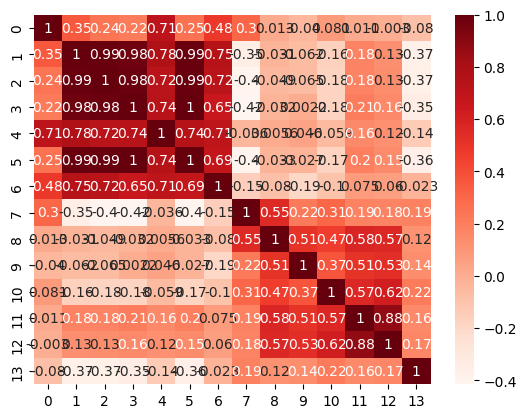

In [44]:
sns.heatmap(scaled_spread_data.corr(),
            cmap = 'Reds',
            annot=True)

In [45]:
px.line(scaled_spread_data,
        y=[0,2,4,6,8,10,12])

In [46]:
px.line(scaled_spread_data,
        y=[10,2,6])

In [47]:
px.line(scaled_spread_data,
        y=[2])

In [48]:
px.line(scaled_spread_data,
        y=[1,3,5,7,9,11,13])

In [49]:
px.line(scaled_spread_data,
        y=[1,3,5])

In [50]:
px.line(scaled_spread_data,
        y=[1,3,5,2,4,6])